# Deep Learning with TensorFlow

Classical machine learning relies on using statistics to determine relationships between features and labels, and can be very effective for creating predictive models. However, a massive growth in the availability of data coupled with advances in the computing technology required to process it has led to the emergence of new machine learning techniques that mimic the way the brain processes information in a structure called an artificial neural network.

TensorFlow is a framework for creating machine learning models, including deep neural networks (DNNs). In this notebook, we'll explore the basics of using TensorFlow to create a simple DNN to classify Fashion MNIST dataset. We'll build a neural image classifier using the Fashion MNIST dataset, the aim will be to train a network which can identify various types of clothing based on the low-resolution 28x28 pixel images in this dataset.

let's start by importing the TensorFlow libraries we're going to use. We will start by installing TensorFlow.You can do this using the pip package manager.

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


now we can import tensorflow and check the version:

In [2]:
import tensorflow as tf
tf.__version__

'2.12.0'

We will import other libraries as we need them. Let's import the Keras Library, which is the high-level API for TensorFlow that we'll use to create and work with our neural network.

In [3]:
from tensorflow import keras
keras.__version__

'2.12.0'

Let's load the MNIST data-set, scaling pixel values into the 0..1 range (by default they range from 0..255), and splitting it into training, test and validation sets.

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

4422102/4422102 [==============================] - 1s 0us/step


The data stored for each image is a 28x28 collection of pixels. We can visually display this using the imshow() function from Matplotlib:

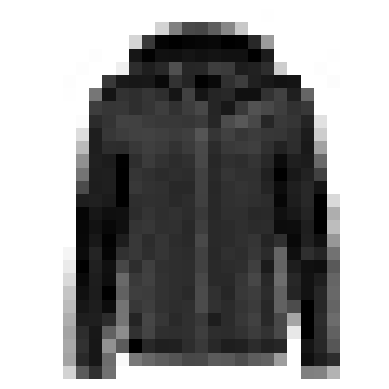

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary") #edit the 0 here to look at other examples\
plt.axis('off')
plt.show()

The y arrays hold the class index for each example. We can make this easier to interpret by defining an array of strings corresponding to these indices, and then we can display the class name for any example:

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

## Define a neural network

Now we're ready to define our neural network. In this case, we'll create a network that consists of 3 fully-connected layers:
* An input layer that receives an input value for each feature (in this case, 28 * 28 image), we'll have a single input layer ('Flatten' is used here to convert the 28x28 2D array of pixels to a vector of 784 input neurons).
* 2 hidden (fully-conntected) layer that receives ten inputs and applies a *ReLU* activation function.
* An output layer that uses a *SoftMax* activation function to generate an output for each class (which represent the classification probabilities for each of the 10 various types of clothing that we have). Softmax functions produce a vector with probability values that sum to 1.

The first hidden layer will need a large number of neurons (300), and we can reduce the number in the second layer (to 100), and then 10 in the output layer (corresponding to the 10 classes in the dataset).

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Once the model is created, we can check its structure using

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


For this network you can see that we already have more than 266,610 parameters (weights).

## Train the model

In order to actually train the model we need to specify the loss function and optimizer we want to use, and then tell it to fit the training data. we also specify how long the training should run for (how many epochs).

We will use the Adam optimizer, which is a popular optimizer that adjusts the learning rate throughout the training process.
The loss function is used to measure how closely the model's output matches the target value. 

The goal of training is to minimize the loss function, we will use the sparse_categorical_crossentropy loss function, which is appropriate for integer encoded class labels (in this case, 0-9).

The metrics parameter is used to provide a list of metrics we want to track during training. In this case, we'll specify accuracy, the proportion of images that are correctly classified.

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
# train the model for 10 epochs
num_epochs = 10
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 3ms/step - loss: 0.4835 - accuracy: 0.8255 - val_loss: 0.3825 - val_accuracy: 0.8674
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3630 - accuracy: 0.8668 - val_loss: 0.3334 - val_accuracy: 0.8814
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3290 - accuracy: 0.8782 - val_loss: 0.3360 - val_accuracy: 0.8776
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3038 - accuracy: 0.8860 - val_loss: 0.3527 - val_accuracy: 0.8788
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2866 - accuracy: 0.8937 - val_loss: 0.3064 - val_accuracy: 0.8886
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2712 - accuracy: 0.8971 - val_loss: 0.3341 - val_accuracy: 0.8760
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2608 - accuracy: 0.9015 - val_loss: 0.3172 - val_accuracy

While the training process is running, let's try to understand what's happening:

1. In each *epoch*, the full set of training data is passed forward through the network.
2. The matrix of feature values is processed by a function that performs a weighted sum using initialized weights and bias values. The result of this function is then processed by the activation function for the input layer to constrain the values passed to the nodes in the next layer.
3. The weighted sum and activation functions are repeated in each layer. Note that the functions operate on vectors and matrices rather than individual scalar values. In other words, the forward pass is essentially a series of nested linear algebra functions. This is the reason data scientists prefer to use computers with graphical processing units (GPUs), since these are optimized for matrix and vector calculations.
4. In the final layer of the network, the output vectors contain a probability value for each possible class (in this case, classes 0, 1, 2, to 9). This vector is processed by a *loss function* to determine how far the values calculated by the network are from the actual values. This variance is aggregated for each epoch and maintained as a running aggregate to calculate the overall level of error (*loss*) incurred by the training data for the epoch. The accuracy (proportion of correct predictions based on the highest probability value in the output vector) for the training data is also calculated.
5. At the end of each epoch, the validation data is passed through the network, and its loss and accuracy are also calculated. It's important to do this because it enables us to compare the performance of the model using data on which it was not trained, helping us determine if it will generalize well for new data or if it's *overfitted* to the training data.
6. After all the data has been passed forward through the network, the output of the loss function for the *training* data (but <u>not</u> the *validation* data) is passed to the opimizer. The precise details of how the optimizer processes the loss vary depending on the specific optimization algorithm being used; but fundamentally you can think of the entire network, from the input layer to the loss function as being one big nested (*composite*) function. The optimizer applies some differential calculus to calculate *partial derivatives* for the function with respect to each weight and bias value that was used in the network. It's possible to do this efficiently for a nested function due to something called the *chain rule*, which enables you to determine the derivative of a composite function from the derivatives of its inner function and outer functions. You don't really need to worry about the details of the math here (the optimizer does it for you), but the end result is that the partial derivatives tell us about the slope (or *gradient*) of the loss function with respect to each weight and bias value - in other words, we can determine whether to increase or decrease the weight and bias values in order to decrease the loss.
7. Having determined in which direction to adjust the weights and biases, the optimizer uses the *learning rate* to determine by how much to adjust them; and then works backwards through the network in a process called *backpropagation* to assign new values to the weights and biases in each layer.
8. Now the next epoch repeats the whole training, validation, and backpropagation process starting with the revised weights and biases from the previous epoch - which hopefully will result in a lower level of loss.
9. The process continues like this for 10 epochs.

## Review training and validation loss

After training is complete, we can examine the loss metrics we recorded while training and validating the model. We're really looking for two things:
* The loss should reduce with each epoch, showing that the model is learning the right weights and biases to predict the correct labels.
* The training loss and validation loss should follow a similar trend, showing that the model is not overfitting to the training data.

Let's plot the loss metrics and see:

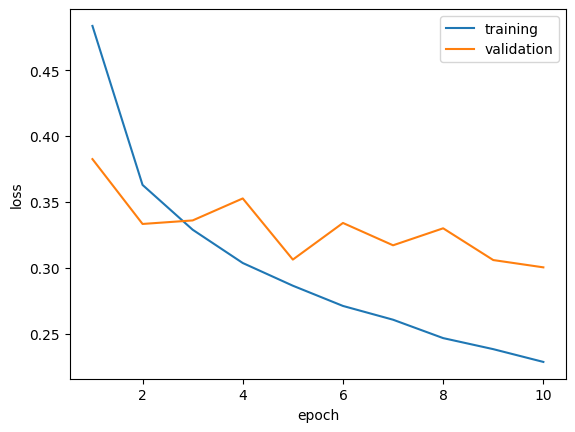

In [11]:
epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

## Save the trained model
Now we can believe the model is reasonably accurate, we can save its trained weights for use later.

In [14]:
# Save the trained model
modelFileName = 'models/fashion-mnist-classifier.h5'
model.save(modelFileName)
print('model saved as', modelFileName)

model saved as models/fashion-mnist-classifier.h5


## Learn more

This notebook was designed to help you understand the basic concepts and principles involved in deep neural networks, using a simple Tensorflow example. To learn more about Tensorflow, take a look at the <a href="https://www.tensorflow.org/" target="_blank">Tensorflow web site</a>.